# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: We want to see how admission to a graduate program is affected by an applicant's GRE score, GPA, and the rank/prestige of their undergraduate institution. We aim to predict the probability of admission given an applicant's GPA, GRE, and the rank of his/her undergraduate institution by fitting an appropriate model to the data described below.

### Dataset:  Write up a description of your data and any cleaning that was completed

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns

Variable | Description | Type of Variable
---| ---| ---
admit | 0 = not admit; 1 = admit | categorical
gre | GRE (Graduate Record Examination) Score on a scale of 0 - 800 | continuous 
gpa | Undergraduate GPA (Grade Point Average) on a scale of 0.0 - 4.0 | continous
rank | Prestige of undergraduate institution; 1 = most prestigious, 4 = least prestigious | categorical

In [13]:
df_raw = pd.read_csv("admissions.csv")
df = df_raw.dropna() 
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


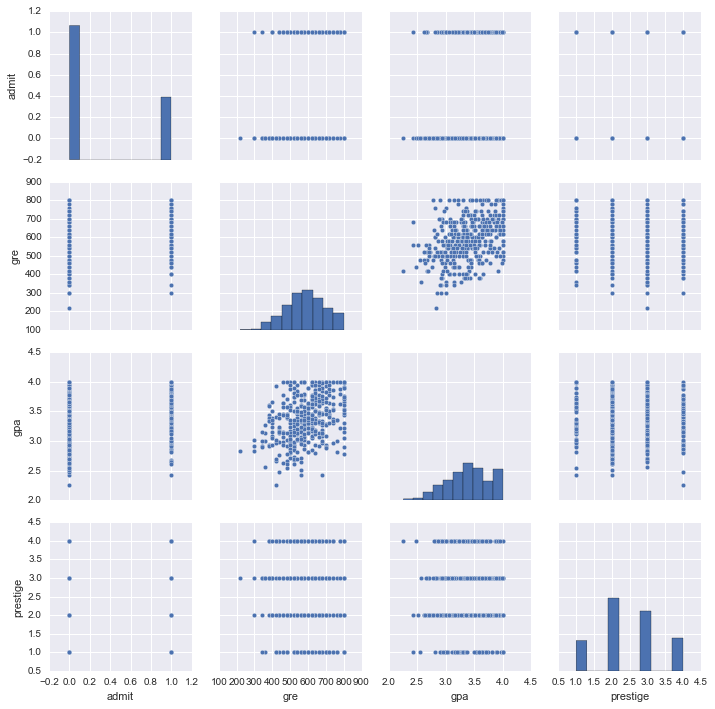

In [3]:
sns.pairplot(df, size = 2.5);

Using a pairwise plot, we have some visual insight into the data:

Along the diagonal, we can see the general distributions of each of the variables. For the GRE and GPA scores (covariates), the distributions look to be negatively skewed. Despite the dataset containing both 'admits' and 'non-admits', the data is still biased towards those with higher GRE and GPA scores relative to the entire population of GRE and GPA scores. Those with higher scores would be more inclined to apply to a graduate program assuming a greater chance of admittance, and those with lower scores are likely excluded from this dataset as they did not choose to apply. 


Additionally, GRE and GPA scores are look to be positively correlated to each other as those who typically scored better in undergraduate class would score better on the GRE. This is demonstrated in the middle two graphs plotting GRE against GPA.

Although rank/prestige is a categorical variable, it is factorable and we can make similar assumptions about the distribution. Similar to the assumption for GRE and GPA scores, the applicants would likely come from school of higher prestige (lower rank, and therefore positively skewed).

In [14]:
dummies = pd.get_dummies(df['prestige'], prefix = 'prestige')
df = df.join(dummies)
df.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0


Since 'prestige' is a categorical variable, we need to create dummy variables in order to accurately model our data.

### Demo: Provide a table that explains the data by admission status

In [5]:
prestigeCT = pd.crosstab(index = df['prestige'], columns = df['admit'], normalize = "index")
prestigeCT

admit,0,1
prestige,,
1.0,0.459016,0.540984
2.0,0.641892,0.358108
3.0,0.768595,0.231405
4.0,0.820896,0.179104


In [6]:
gpa_gre = df.groupby('admit').agg([np.mean, np.std])[['gpa','gre']].transpose()
gpa_gre

admit              0           1
gpa mean    3.347159    3.489206
    std     0.376355    0.371655
gre mean  573.579336  618.571429
    std   116.052798  109.257233

In [7]:
summary = pd.concat([prestigeCT, gpa_gre])
summary

admit,0,1
prestige,,
1.0,0.459016,0.540984
2.0,0.641892,0.358108
3.0,0.768595,0.231405
4.0,0.820896,0.179104
"(gpa, mean)",3.347159,3.489206
"(gpa, std)",0.376355,0.371655
"(gre, mean)",573.579336,618.571429
"(gre, std)",116.052798,109.257233


In [55]:
# alternatively can also use the describe function to get more summary statistics for gpa and gre
# df.groupby('admit').describe()[['gpa','gre']]

### Methods: Write up the methods used in your analysis

Answer: Given admit is a binary variable that we're trying to predict, we will use logistic regression to ir our data and estimate probabilties of admission based on our model.

As demonstrated above, we created dummy variables for 'prestige' as it was a categorical variable.  The first dummy ('prestige_1.0') can be dropped from the modelling data as it is redundant and can create issues of multicollinearity. Since we're using stats models, we will also need to set an intercept before running the logistic regression. Therefore for the purpose of this model, we will be predicting admittance using the gre, gpa, remaining prestige dummies, and manually input intercept.

In [17]:
df['intercept'] = 1.0

In [24]:
X = df[['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0', 'intercept']]
y = df['admit']
result = sm.Logit(y, X).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Thu, 27 Oct 2016   Pseudo R-squ.:                 0.08166
Time:                        15:23:14   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.146      0.032        -1.301    -0.059
prestige_3.0    -1.3387      0.345     -3.882      0.000        -2.015    -0.663
prestige_4.0    -1.5534      0.417     -3.721      0.000        -2.372    -0.735
intercept       -3.8769      1.142     -3.393      0.001        -6.116    -1.638
================================================================================
"""

Using the coefficients from the logistic regression model above, we can see the change in log odds of admission for a unit change in each variable. To make this information more digestable, we can raise e to the power of the coefficient to determine the change in odds as the variables change. 

In [25]:
np.exp(result.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64

The odds for being admitted with a one point increase in gpa is about 2.18x greater. The odds of admission after attending a rank 2 undergraduate is about half of those who attended a rank 1 undergraduate. The odds relative to rank 1 drop to about .26 for attending rank 3, and 0.02 for attending rank 4.

We can then predict probabilities of admission using the model we just fit, on generated values of gre, gpa, and prestige. This will be done by creating a cartesian product of input arrays to help predict the probabilities of admission given a range of values for each variable.

In [34]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [35]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(df['gre'].min(), df['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(df['gpa'].min(), df['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4]]))
print combos.head()

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]
       0         1    2
0  220.0  2.260000  1.0
1  220.0  2.260000  2.0
2  220.0  2.260000  3.0
3  220.0  2.260000  4.0
4  220.0  2.453333  1.0


In [36]:
# recreate the dummy variables
dummies = pd.get_dummies(combos[2], prefix = "prestige")

# keep only what we need for making predictions
combos = combos.join(dummies)
combos.columns = ['gre', 'gpa', 'prestige', 'prestige1', 'prestige2', 'prestige3', 'prestige4']
combos['intercept'] = 1.

In [37]:
train_cols = combos[['gre', 'gpa', 'prestige2', 'prestige3', 'prestige4', 'intercept']]
combos['predict'] = result.predict(train_cols)
combos.tail(4)

,gre,gpa,prestige,prestige1,prestige2,prestige3,prestige4,intercept,predict
396,800.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.734040
397,800.0,4.0,2.0,0.0,1.0,0.0,0.0,1.0,0.582995
398,800.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0,0.419833
399,800.0,4.0,4.0,0.0,0.0,0.0,1.0,1.0,0.368608


### Results: Write up your results

Answer: Using the last 4 observations as an example: For individuals with perfect scores (gre = 800 and gpa = 4.0), the predicted probability of being admitted having attended a rank 1 undergrad is ~ 73%, versus the 58% for rank 2, and so on. This shows that despite having perfect credentials in gre scores and gpa scores, if the applicant attended a rank 4 undergraduate university the predicted probability of being accepted into a grad school program is only 37%. Likewise, having perfect gre and gpa scores as well as attending a rank 1 university does not guarantee admission (most likely due to the limited number of spots) but there is a high probability of admittance at 73%.

### Visuals: Provide a table or visualization of these results

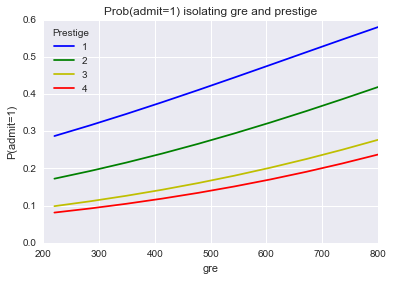

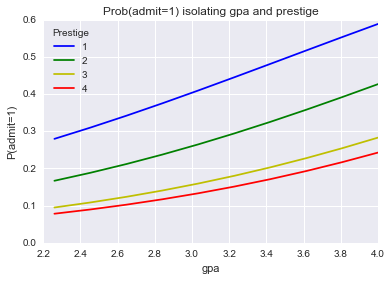

In [32]:
def isolate_and_plot(variable):
    grouped = pd.pivot_table(combos, values=['predict'], index=[variable, 'prestige'],
                            aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['predict'],
            color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and prestige")
    pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')

The probability of admittance between rank 3 and rank 4 undergrad applicants is fairly similar, with rank 3 applicants having a slightly better chance given the same gre and gpa scores when they are isolated alongside prestige. The probabilities of admission also seem to increase at a higher rate as the gpa/gre scores increase, as the effects of increasing the scores in other factors are compounded in increasing probability.

### Discussion: Write up your discussion and future steps

Answer: As predicted, gre, gpa, and prestige are all variables which have an effect on the probability of admittance (albeit some more influential than others). As demonstrated above, an increase in prestige of undergrad (lower rank) was demonstrated to significantly increase the probability of admittance for all gpas and gres. The model showed that the odds of acceptance decreased by ~50% when dropping from a rank 1 undergrad to a rank 2 undergrad, and dropped by 75% when compared to a rank 3 undergrad.

Given the reality of the grad school admissions process, there are many other factors involved in addition to the ones measured in this dataset. We could collect more data about the applicants and then subsequently eliminate those which do not prove to be significant in modelling the data (perhaps using LASSO regularization to ensure the overfitting does not occur). It is possible that gender and other demographics of the applicant may be influencing the admission decision but is not captured in this model and can be worth exploring. With the increase in variables, there is also an increased likelihood that data points may be missing. Fortunately there were only 3 NA values in this given dataset so dropping those observations did not necessarily impact the model too much. However as we come across more missing values with the increase in variables, we will need to consider the approrpriate imputing methods to ensure as much of the data can be used as possible.

Additional exploration for the given variables include an assessment of what falls into each prestige bucket. Universities rise and drop in ranks every year, so if we are to reproduce this analysis in coming years the prestige variable will also need to be dynamic in the same sense. The other variables should remain relatively stable over the years (but who knows!). 

This analysis was useful in giving us a glimpse into admission factors, however more data needs to be collected and similarly modelled to give us a more holistic picture of the admission process. 

N.B. It has also shown that being $200,000 in debt for attending a rank 1 undergrad may be of value in the admissions process to graduate school, but if you'd like for that debt to be paid back in only the slowest way possible.

## Feedback
Superb.

| Requirements | Incomplete (0) | Does Not Meet Expectations (1) | Meets Expectations (2) | Exceeds Expectations (3) |
|---|---|---|---|---|
| Outlined methods and models | | | |X |
| Articulation of "specific aim" and datasets | | |X | |
| Risks and assumptions | | | |X |
| Goals and criteria for success | | | |X |
| Exploratory data analysis overview with visualizations and statistical analysis | | | | X|
| Writeup with interpretation of findings, an executive summary, conclusions, and next steps | | | |X |